In [15]:
from skimage import io
import os
from my_functions.otsu import otsu_thresholding 
import numpy as np
def anwendung(function,input_path,result_path):
    files = os.listdir(input_path)
    for file in files:
        file_path = os.path.join(input_path,file)
        result_file_path = os.path.join(result_path,file)
        result = function(io.imread(file_path))
        io.imsave(result_file_path,result)
        
def otsu_thresholding2(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()
    

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    
    
    #leere Liste für alle within class variances erstellen
    variance_list = list()

    # optimalen threshhold herausfinden
    for T in range(1,len(counts)):
        
        #within class variance herausfinden
        
        #definieren von w0 und Hintergrund Mittelwert
        sum_back = 0 
        mean_sum_back = 0
        for i in range(0,T):
            sum_back += counts[i]
            mean_sum_back += counts[i] * bins[i]

        w0 = sum_back / sum(counts)
        mean_back = mean_sum_back / sum_back


        #definieren von w1 und Vordergrund Mittelwert
        sum_obj = 0
        mean_sum_obj = 0

        for j in range(T,len(counts)):
            sum_obj += counts[j]
            mean_sum_obj += counts[j] * bins[j]

        w1 = sum_obj / sum(counts)
        mean_obj = mean_sum_obj / sum_obj

        #Varianz Hintergrund
        var_sum_back = 0
        for k in range(0, T):
            var_sum_back += counts[k] * (bins[k] - mean_back)**2 

        var_back = var_sum_back / sum_back

        #Varianz Vordergrund
        var_sum_obj = 0
        for l in range(T, len(counts)):
            var_sum_obj += counts[l] * (bins[l] - mean_obj)**2 

        var_obj = var_sum_obj / sum_obj

        # Within Class Varianz berechnen
        within_class_varianz = w0 * var_back + w1 * var_obj
        
        #within class variance zu Liste hinzufügen
        variance_list.append(within_class_varianz)
   
    #minimalen Wert für T aussuchen 
    minvar = min(variance_list)
    for m in range(0,len(variance_list)):
        if variance_list[m] == minvar: 
            THRESH = round(bins[m])

    
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 65535
    return imgT

#otsu vektorisiert
import numpy as np

def otsu_thresholding_vek(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    sum_back = np.cumsum(counts)[:-1]
    sum_obj = sum(counts)-sum_back
    mean_back = np.cumsum(bins[:-2]*counts[:-1])/sum_back
    mean_obj = (sum(bins[:-2]*counts[:-1])-np.cumsum(bins[:-2]*counts[:-1]))/sum_obj
    w0_list = sum_back/sum(counts)
    w1_list = 1 - w0_list

    #calculate background and foreground variance
    var_back_list = list()
    var_obj_list = list()
    for i in range (0,len(mean_back)):
        var_back = sum(counts[:i]*(bins[:i]-mean_back[i])**2)/sum_back[i]
        var_back_list.append(var_back)
        var_obj = sum(counts[i:]*(bins[i:-1]-mean_obj[i])**2)/sum_obj[i]
        var_obj_list.append(var_obj)
    
    
        
    wcv_list = (w0_list * var_back_list) + (w1_list * var_obj_list)
    THRESH = bins[np.argmin(wcv_list)]

    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

#otsu vektorisiert
import numpy as np

def otsu_thresholding_vek2(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    sum_back = np.cumsum(counts)[:-1]
    sum_obj = sum(counts)-sum_back
    mean_back = np.cumsum(bins[:-2]*counts[:-1])/sum_back
    mean_obj = (sum(bins[:-2]*counts[:-1])-np.cumsum(bins[:-2]*counts[:-1]))/sum_obj
    w0_list = sum_back/sum(counts)
    w1_list = 1 - w0_list

    #calculate background and foreground variance
    var_back_list = list()
    var_obj_list = list()
    for i in range (0,len(mean_back)):
        var_back = sum(counts[:i]*(bins[:i]-mean_back[i])**2)/sum_back[i]
        var_back_list.append(var_back)
        var_obj = sum(counts[i:]*(bins[i:-1]-mean_obj[i])**2)/sum_obj[i]
        var_obj_list.append(var_obj)
    
    
        
    wcv_list = (w0_list * var_back_list) + (w1_list * var_obj_list)
    THRESH = bins[np.argmin(wcv_list)]

    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 65535
    return imgT

In [5]:


#Anwendung auf ungefilterte Bilder

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../BilderDaten/BilderDaten/N2DH-GOWT1/img/','../Ergebnisse/Otsu/N2DH-GOWT1/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../BilderDaten/BilderDaten/N2DL-HeLa/img/','../Ergebnisse/Otsu/N2DL-HeLa/')

#NIH3T3
anwendung(otsu_thresholding,'../BilderDaten/BilderDaten/NIH3T3/img/','../Ergebnisse/Otsu/NIH3T3/')
    
#Anwendung auf meanfilter Bilder 3x3

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Mean/N2DH-GOWT1/3x3/','../Ergebnisse/Mean+Otsu/N2DH-GOWT1/3x3/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Mean/N2DL-HeLa/3x3/','../Ergebnisse/Mean+Otsu/N2DL-HeLa/3x3/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Mean/NIH3T3/3x3/','../Ergebnisse/Mean+Otsu/NIH3T3/3x3/')

#Anwendung auf meanfilter Bilder 5x5

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Mean/N2DH-GOWT1/5x5/','../Ergebnisse/Mean+Otsu/N2DH-GOWT1/5x5/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Mean/N2DL-HeLa/5x5/','../Ergebnisse/Mean+Otsu/N2DL-HeLa/5x5/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Mean/NIH3T3/5x5/','../Ergebnisse/Mean+Otsu/NIH3T3/5x5/')

#Anwendung auf medianfilter Bilder 3x3

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Median/N2DH-GOWT1/3x3/','../Ergebnisse/Median+Otsu/N2DH-GOWT1/3x3/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Median/N2DL-HeLa/3x3/','../Ergebnisse/Median+Otsu/N2DL-HeLa/3x3/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Median/NIH3T3/3x3/','../Ergebnisse/Median+Otsu/NIH3T3/3x3/')

#Anwendung auf meanfilter Bilder 5x5

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Median/N2DH-GOWT1/5x5/','../Ergebnisse/Median+Otsu/N2DH-GOWT1/5x5/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Median/N2DL-HeLa/5x5/','../Ergebnisse/Median+Otsu/N2DL-HeLa/5x5/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Median/NIH3T3/5x5/','../Ergebnisse/Median+Otsu/NIH3T3/5x5/')


#anwendung auf histogramm stretching bilder

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Histogramm_stretching/N2DH-GOWT1/','../Ergebnisse/Histogramm+Otsu/N2DH-GOWT1/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Histogramm_stretching/N2DL-HeLa/','../Ergebnisse/Histogramm+Otsu/N2DL-HeLa/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Histogramm_stretching/NIH3T3/','../Ergebnisse/Histogramm+Otsu/NIH3T3/')

#anwendung auf gauss bilder sigma = 1

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Gauss/N2DH-GOWT1/1/','../Ergebnisse/Gauss+Otsu/N2DH-GOWT1/1/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Gauss/N2DL-HeLa/1/','../Ergebnisse/Gauss+Otsu/N2DL-HeLa/1/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Gauss/NIH3T3/1/','../Ergebnisse/Gauss+Otsu/NIH3T3/1/')

#anwendung auf gauss bilder sigma = 2

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Gauss/N2DH-GOWT1/2/','../Ergebnisse/Gauss+Otsu/N2DH-GOWT1/2/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Gauss/N2DL-HeLa/2/','../Ergebnisse/Gauss+Otsu/N2DL-HeLa/2/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Gauss/NIH3T3/2/','../Ergebnisse/Gauss+Otsu/NIH3T3/2/')

#anwendung auf gauss bilder sigma = 3

#N2DH-GOWT1
anwendung(otsu_thresholding2,'../Ergebnisse/Gauss/N2DH-GOWT1/3/','../Ergebnisse/Gauss+Otsu/N2DH-GOWT1/3/')

#N2DL-HeLa
anwendung(otsu_thresholding2,'../Ergebnisse/Gauss/N2DL-HeLa/3/','../Ergebnisse/Gauss+Otsu/N2DL-HeLa/3/')

#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Gauss/NIH3T3/3/','../Ergebnisse/Gauss+Otsu/NIH3T3/3/')


In [14]:
#N2DH-GOWT1
anwendung(otsu_thresholding_vek2,'../Ergebnisse/Histogramm_stretching/N2DH-GOWT1/','../Ergebnisse/Histogramm+Otsu/N2DH-GOWT1/')

#N2DL-HeLa
anwendung(otsu_thresholding_vek2,'../Ergebnisse/Histogramm_stretching/N2DL-HeLa/','../Ergebnisse/Histogramm+Otsu/N2DL-HeLa/')

#NIH3T3
anwendung(otsu_thresholding_vek,'../Ergebnisse/Histogramm_stretching/NIH3T3/','../Ergebnisse/Histogramm+Otsu/NIH3T3/')


/var/folders/4z/0_jq56zn0sg815q14fzlmk200000gr/T/ipykernel_69064/2006508675.py:11: UserWarning: ../Ergebnisse/Histogramm+Otsu/NIH3T3/dna-37.png is a low contrast image
  io.imsave(result_file_path,result)


In [6]:
#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Mean/NIH3T3/5x5/','../Ergebnisse/Mean+Otsu/NIH3T3/5x5/')

/var/folders/4z/0_jq56zn0sg815q14fzlmk200000gr/T/ipykernel_69064/2477758245.py:11: UserWarning: ../Ergebnisse/Mean+Otsu/NIH3T3/5x5/dna-37.png is a low contrast image
  io.imsave(result_file_path,result)


In [7]:
#NIH3T3
anwendung(otsu_thresholding,'../Ergebnisse/Median/NIH3T3/3x3/','../Ergebnisse/Median+Otsu/NIH3T3/3x3/')


/var/folders/4z/0_jq56zn0sg815q14fzlmk200000gr/T/ipykernel_69064/2477758245.py:11: UserWarning: ../Ergebnisse/Median+Otsu/NIH3T3/3x3/dna-37.png is a low contrast image
  io.imsave(result_file_path,result)


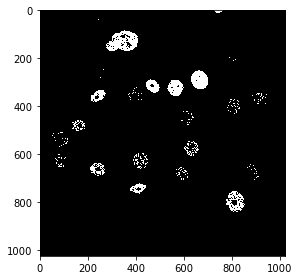

In [9]:
io.imshow(otsu_thresholding(io.imread('../Ergebnisse/Histogramm_stretching/N2DH-GOWT1/t01.tif')))

In [17]:
#N2DH-GOWT1
anwendung(otsu_thresholding_vek2,'../Ergebnisse/Histogramm_stretching/N2DH-GOWT1/','../Ergebnisse/Histogramm+Otsu/N2DH-GOWT1/')